In [1]:
#Loading libraries
library(rpart,quietly = TRUE)
library(caret,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(rattle)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [2]:
#Reading the data set as a dataframe
mushrooms <- read.csv ("C:/Users/User/Downloads/datasets/beginner_datasets/mushrooms.csv")

In [3]:
str(mushrooms)

'data.frame':	8124 obs. of  23 variables:
 $ class                   : chr  "p" "e" "e" "p" ...
 $ cap.shape               : chr  "x" "x" "b" "x" ...
 $ cap.surface             : chr  "s" "s" "s" "y" ...
 $ cap.color               : chr  "n" "y" "w" "w" ...
 $ bruises                 : chr  "t" "t" "t" "t" ...
 $ odor                    : chr  "p" "a" "l" "p" ...
 $ gill.attachment         : chr  "f" "f" "f" "f" ...
 $ gill.spacing            : chr  "c" "c" "c" "c" ...
 $ gill.size               : chr  "n" "b" "b" "n" ...
 $ gill.color              : chr  "k" "k" "n" "n" ...
 $ stalk.shape             : chr  "e" "e" "e" "e" ...
 $ stalk.root              : chr  "e" "c" "c" "e" ...
 $ stalk.surface.above.ring: chr  "s" "s" "s" "s" ...
 $ stalk.surface.below.ring: chr  "s" "s" "s" "s" ...
 $ stalk.color.above.ring  : chr  "w" "w" "w" "w" ...
 $ stalk.color.below.ring  : chr  "w" "w" "w" "w" ...
 $ veil.type               : chr  "p" "p" "p" "p" ...
 $ veil.color              : chr  "w" "w

In [4]:
# number of rows with missing values
nrow(mushrooms) - sum(complete.cases(mushrooms))

[1] 0

In [5]:
# deleting redundant variable `veil.type`
mushrooms$veil.type <- NULL

In [6]:
# analyzing the odor variable
table(mushrooms$class,mushrooms$odor)

   
       a    c    f    l    m    n    p    s    y
  e  400    0    0  400    0 3408    0    0    0
  p    0  192 2160    0   36  120  256  576  576

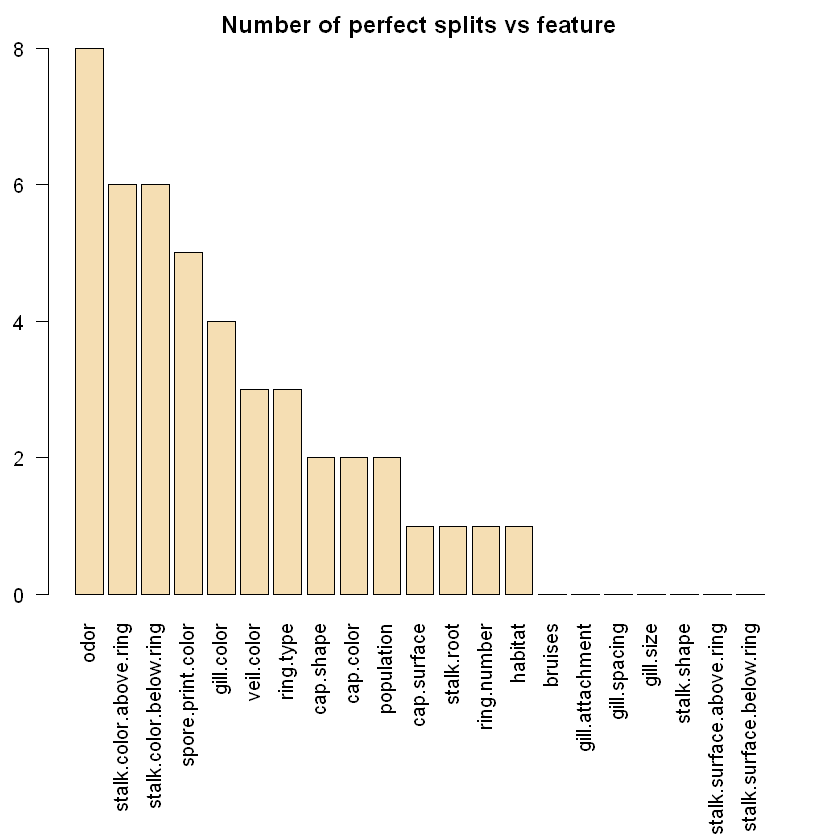

In [7]:
number.perfect.splits <- apply(X=mushrooms[-1], MARGIN = 2, FUN = function(col){
t <- table(mushrooms$class,col)
sum(t == 0)
})
 
# Descending order of perfect splits
order <- order(number.perfect.splits,decreasing = TRUE)
number.perfect.splits <- number.perfect.splits[order]
 
# Plot graph
par(mar=c(10,2,2,2))
barplot(number.perfect.splits,
main="Number of perfect splits vs feature",
xlab="",ylab="Feature",las=2,col="wheat")

In [8]:
#data splicing
set.seed(12345)
train <- sample(1:nrow(mushrooms),size = ceiling(0.80*nrow(mushrooms)),replace = FALSE)
# training set
mushrooms_train <- mushrooms[train,]
# test set
mushrooms_test <- mushrooms[-train,]

In [9]:
# penalty matrix
penalty.matrix <- matrix(c(0,1,10,0), byrow=TRUE, nrow=2)

In [10]:
# building the classification tree with rpart
tree <- rpart(class~.,
data=mushrooms_train,
parms = list(loss = penalty.matrix),
method = "class")

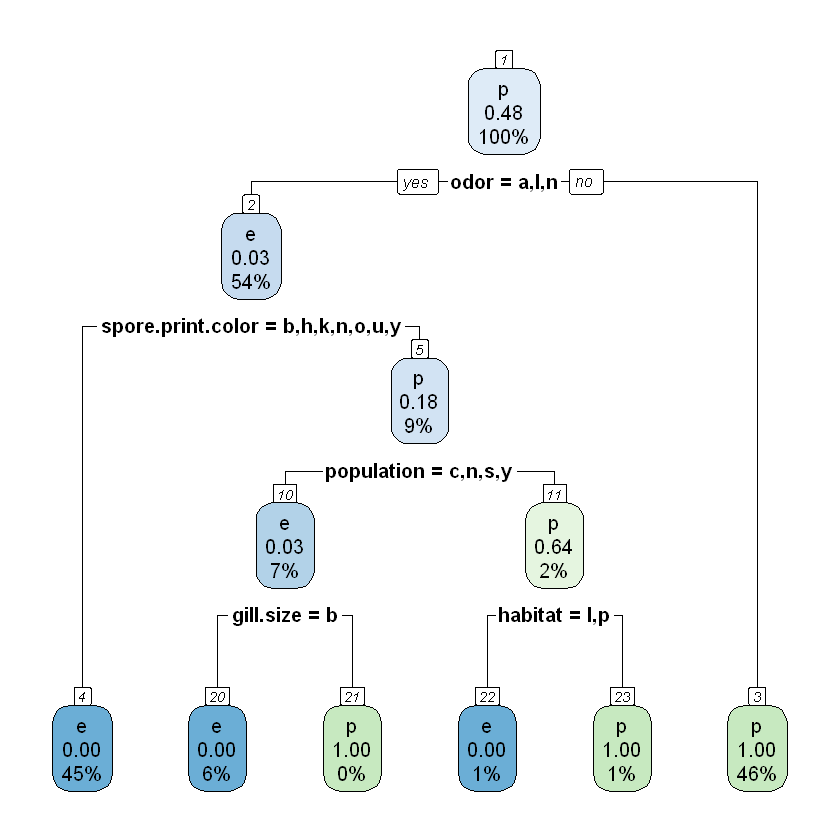

In [11]:
# Visualize the decision tree with rpart.plot
rpart.plot(tree, nn=TRUE)

In [12]:
#Testing the model
pred <- predict(object=tree,mushrooms_test[-1],type="class")

In [13]:
#Calculating accuracy
t <- table(mushrooms_test$class,pred) 

In [14]:
#install.packages('e1071', dependencies=TRUE)
confusionMatrix(t)

Confusion Matrix and Statistics

   pred
      e   p
  e 829   0
  p   0 795
                                     
               Accuracy : 1          
                 95% CI : (0.9977, 1)
    No Information Rate : 0.5105     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5105     
         Detection Rate : 0.5105     
   Detection Prevalence : 0.5105     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : e          
                                     